In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('./data/stack-overflow-2018-developer-survey/survey_results_public.csv')

print(f'Shape: {df.shape}')

df.head()

Shape: (98855, 129)


/Users/rook/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


## Coding as a hobby
---

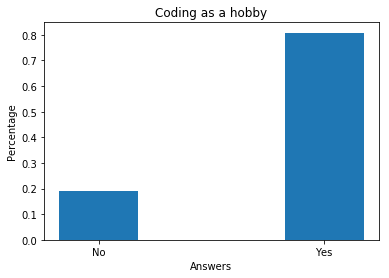

In [4]:
# Add both 'yes' and 'no' counts for total sample size
sample_size = df['Hobby'].value_counts()[0] + df['Hobby'].value_counts()[1]

# Calculate 'yes' and 'no' percentages
yes_percentage = df['Hobby'].value_counts()[0] / sample_size
no_percentage = df['Hobby'].value_counts()[1] / sample_size

hobby_percentages = [yes_percentage, no_percentage]

hobby_df = pd.DataFrame(
    hobby_percentages,
    index=['Yes', 'No'],
    columns=['Percentage']
)
    
# Plot results
plt.bar(hobby_df.index, hobby_df['Percentage'], width=.35)
plt.ylabel('Percentage')
plt.xlabel('Answers')
plt.title('Coding as a hobby')
plt.show()

### Explanation:
From this plot, we can conclude that around 80% of surveyed individuals code as a hobby, while around 20% do not.  It seems that thechnology is a *passion* fueled profession.

## Pay vs Experience Correlation
---

In [89]:
# df['Salary']
# df['Salary'].mean()

# sals = df[df['Salary'].notnull()]
# sals['Salary']
# df['Salary'].mean()

# sals['Salary'] = sals['Salary'].str.replace(',','')
# stripped_sals = pd.to_numeric(sals['Salary'])
# stripped_sals

# stripped_sals.mean()

# df.groupby('YearsCodingProf')['Salary'].mean()

## Top 5 residing countries
---

In [5]:
top_3_countries = df['Country'].value_counts()[:5]
top_3_countries

United States     20309
India             13721
Germany            6459
United Kingdom     6221
Canada             3393
Name: Country, dtype: int64

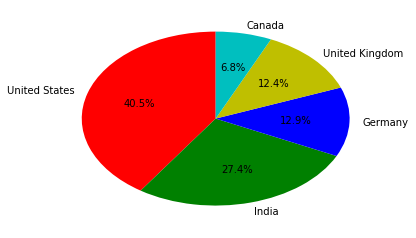

In [6]:
country_slices = top_3_countries
country_list = top_3_countries.index
colors = ['r', 'g', 'b', 'y', 'c']

plt.pie(country_slices, labels=country_list, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

It is evident that the US dwarfs every other country in this analysis.  My guess is, that given such a large number of billion dollar enterprises located in the US, they can offer much higher wages and greater opportunities for advancement than most other countries.

I was surprised to see that China was only 17th on the list.  Given that they have such a large population and such a strong foundation in the technical sciences, I would have expected China to represent a larger portion of the survey.